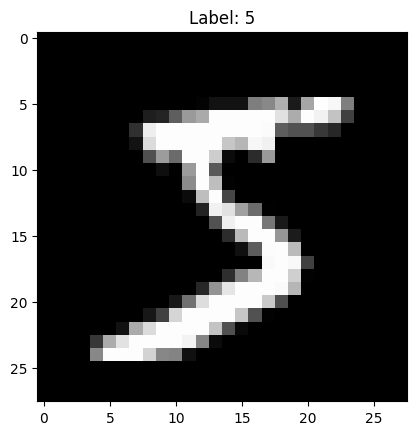

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Show an example
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [3]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

/Users/jesseoh/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8564 - loss: 0.5005 - val_accuracy: 0.9645 - val_loss: 0.1352
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9527 - loss: 0.1570 - val_accuracy: 0.9702 - val_loss: 0.1007
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9671 - loss: 0.1116 - val_accuracy: 0.9732 - val_loss: 0.0930
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9722 - loss: 0.0897 - val_accuracy: 0.9792 - val_loss: 0.0708
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9756 - loss: 0.0784 - val_accuracy: 0.9777 - val_loss: 0.0743


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 0s - 419us/step - accuracy: 0.9760 - loss: 0.0775

Test accuracy: 0.9760


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


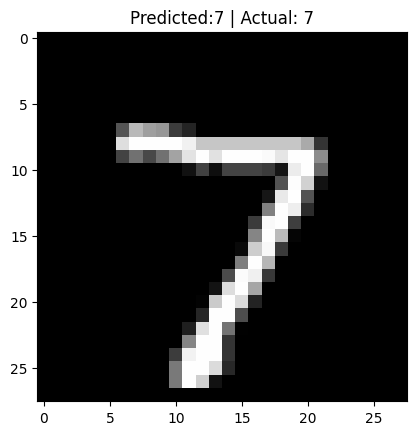

In [6]:
predictions = model.predict(x_test)
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted:{predictions[0].argmax()} | Actual: {y_test[0]}")
plt.show()